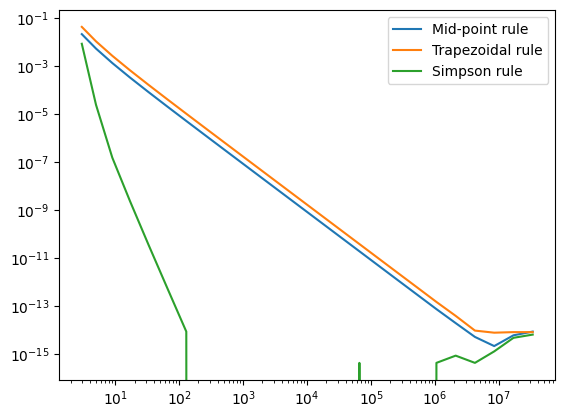

Minimal relative errors:
Midpoint_rule: 2.220e-15%
Trapezoid: 7.994e-15%
Simpson: 0.0%
Empiric orders of congervence for all methods:
Midpoint method: 2.045
Trapezoid method: 2.045
Simpson method: 6.135


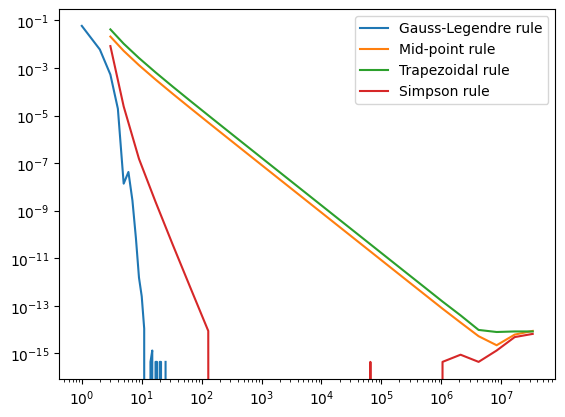

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid as trapz
from scipy.integrate import simpson as simps
def f(x):
    return 4/(1+x**2)

def mid_point_rule(x1,y1):
    return np.sum(y1*(x1[1]-x1[0]))
def trapezoidal_rule(x1,y1):
    return trapz(x=x1,y=y1)

def simpson_rule(x1,y1):
    return simps(x=x1,y=y1)

def calculate_errors(x, y, m):
    mid_point_errors = []
    trapezoidal_errors = []
    simpson_errors = []
    for i in range(1, m + 1):
        ab = np.linspace(start=0, stop=1, num=2**i+1)
        yab = f(ab)
        x1=np.array([(ab[i]+ab[i-1])/2 for i in range(1, len(ab))])
        y1=f(x1)
        mid_point_errors.append(np.abs(np.pi - mid_point_rule(x1, y1)))
        trapezoidal_errors.append(np.abs(np.pi - trapezoidal_rule(ab, yab)))
        simpson_errors.append(np.abs(np.pi - simpson_rule(ab, yab)))
    return mid_point_errors, trapezoidal_errors, simpson_errors
a = 0   
b = 1
m=25
n = np.array([1+2**(i) for i in range(1,m+1)])

mid_point_errors, trapezoidal_errors, simpson_errors = calculate_errors(a, b, m)

plt.plot(n, mid_point_errors, label='Mid-point rule')
plt.plot(n, trapezoidal_errors, label='Trapezoidal rule')
plt.plot(n, simpson_errors, label='Simpson rule')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()
#b
print("Minimal relative errors:")
print(f"Midpoint_rule: {np.format_float_scientific(min(mid_point_errors), precision=3)}%")
print(f"Trapezoid: {np.format_float_scientific(min(trapezoidal_errors), precision=3)}%")
print(f"Simpson: {min(simpson_errors)}%")
h1 = 1/(2**6+1)
h2 = 1/(2**5+1)
eh1_midpoint = mid_point_errors[5]
eh1_trapz = trapezoidal_errors[5]
eh1_simpson = simpson_errors[5]

eh2_midpoint = mid_point_errors[4]
eh2_trapz = trapezoidal_errors[4]
eh2_simpson = simpson_errors[4]

order_midpoint = np.log(eh2_midpoint/eh1_midpoint)/np.log(h2/h1)
order_trapz = np.log(eh2_trapz/eh1_trapz)/np.log(h2/h1)
order_simpson = np.log(eh2_simpson/eh1_simpson)/np.log(h2/h1)

print("Empiric orders of congervence for all methods:")
print(f"Midpoint method: {order_midpoint:.3f}")
print(f"Trapezoid method: {order_trapz:.3f}")
print(f"Simpson method: {order_simpson:.3f}")
from numpy.polynomial.legendre import leggauss as gauss

def gauss_legendre_rule(a, b, n):
    x, w = gauss(n)
    return np.sum(w * f((b - a) / 2 * x + (a + b) / 2)/2)
gauss_legendre_errors = np.array([np.abs(np.pi - gauss_legendre_rule(a, b, i)) for i in range(1, m+1)])
plt.plot(range(1,m+1), gauss_legendre_errors, label='Gauss-Legendre rule')
plt.plot(n, mid_point_errors, label='Mid-point rule')
plt.plot(n, trapezoidal_errors, label='Trapezoidal rule')
plt.plot(n, simpson_errors, label='Simpson rule')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad_vec

In [4]:
def f1(x):
    return 4/(1+x**2)

def f2(x):
    if(x==0):
        return 0
    return np.sqrt(x)*np.log(x)

def f3(x):
    return (1/(((abs(x)-0.3)**2)+0.001)) + (1/(((abs(x)-0.9)**2)+0.004)) - 6

def f3_error(y):
    a = 0.001
    b = 0.004
    return np.abs(y - ((1/np.sqrt(a))*(np.arctan(0.7/np.sqrt(a))+np.arctan(0.3/np.sqrt(a))) + (1/np.sqrt(b))*(np.arctan(0.1/np.sqrt(b))+np.arctan(0.9/np.sqrt(b))) - 6))/np.abs(((1/np.sqrt(a))*(np.arctan(0.7/np.sqrt(a))+np.arctan(0.3/np.sqrt(a))) + (1/np.sqrt(b))*(np.arctan(0.1/np.sqrt(b))+np.arctan(0.9/np.sqrt(b))) - 6))    


In [5]:
def integrator_f1_f2(f):
    errors_gk = []
    evaluations_gk = []
    errors_trap = []
    evaluations_trap = []
    for i in range(15):
        result_gk, error_estimate_gk, num_func_evals_gk = quad_vec(f, 0, 1,quadrature='gk15', epsrel=(1/10)**i,full_output=True)
        errors_gk.append(error_estimate_gk)
        evaluations_gk.append(num_func_evals_gk.neval)
        result_trapz, error_estimate_trapz, num_func_evals_trapz = quad_vec(f, 0, 1, quadrature='trapezoid', epsabs=(1/10)**i,full_output=True)
        errors_trap.append(error_estimate_trapz)
        evaluations_trap.append(num_func_evals_trapz.neval)
    return errors_gk, evaluations_gk, errors_trap, evaluations_trap


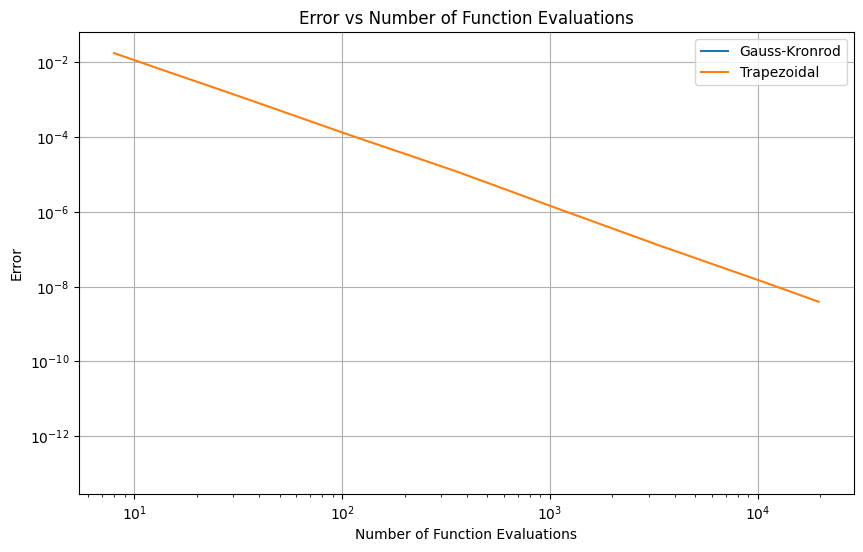

In [6]:
errors_gk1, evaluations_gk1, errors_trap1, evaluations_trap1 = integrator_f1_f2(f1)
x=np.arange(15)
plt.figure(figsize=(10, 6))
plt.loglog(evaluations_gk1, errors_gk1, label='Gauss-Kronrod')
plt.loglog(evaluations_trap1, errors_trap1, label='Trapezoidal')
plt.xlabel('Number of Function Evaluations')
plt.ylabel('Error')
plt.title('Error vs Number of Function Evaluations')
plt.legend()
plt.grid(True)
plt.show()

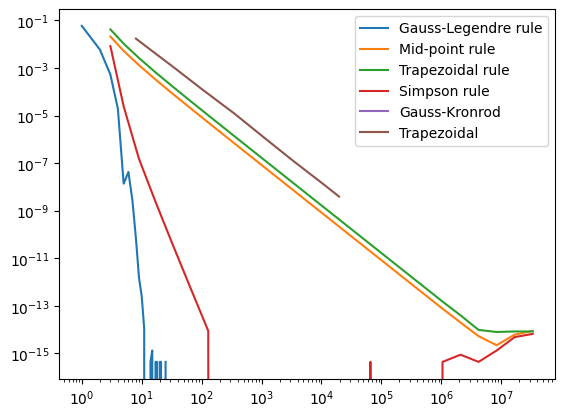

In [7]:
plt.plot(range(1,m+1), gauss_legendre_errors, label='Gauss-Legendre rule')
plt.plot(n, mid_point_errors, label='Mid-point rule')
plt.plot(n, trapezoidal_errors, label='Trapezoidal rule')
plt.plot(n, simpson_errors, label='Simpson rule')
plt.loglog(evaluations_gk1, errors_gk1, label='Gauss-Kronrod')
plt.loglog(evaluations_trap1, errors_trap1, label='Trapezoidal')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

[0.0376798409818559, 0.007719253635081728, 0.0010248602777697886, 0.0001222362092554972, 1.240225891265197e-05, 1.2469499876308717e-06, 1.2487321757327984e-07, 1.2493356139389935e-08, 1.2499630917728896e-09, 6.544105199681563e-10, 6.544105199681563e-10, 6.544105199681563e-10, 6.544105199681563e-10, 6.544105199681563e-10, 6.544105199681563e-10]


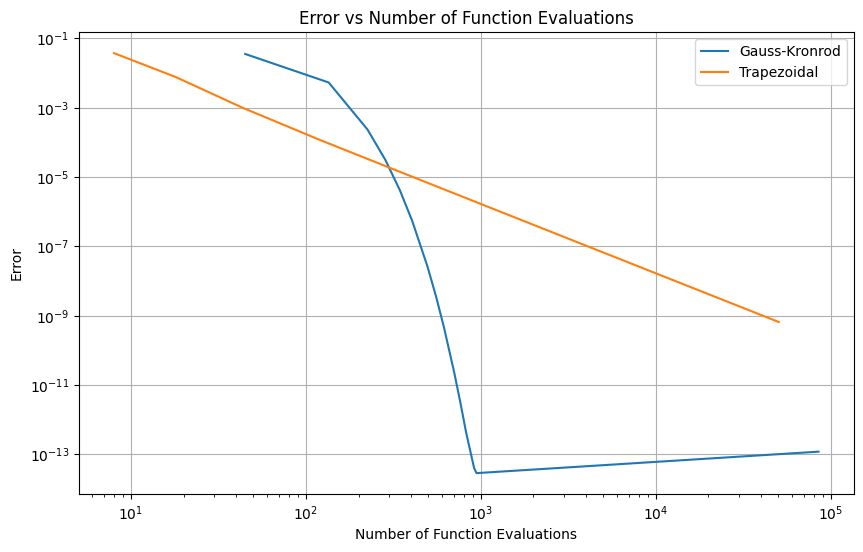

In [8]:

errors_gk2, evaluations_gk2, errors_trap2, evaluations_trap2 = integrator_f1_f2(f2)
# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(evaluations_gk2, errors_gk2, label='Gauss-Kronrod')
plt.loglog(evaluations_trap2, errors_trap2, label='Trapezoidal')
print(errors_trap2)
plt.xlabel('Number of Function Evaluations')
plt.ylabel('Error')
plt.title('Error vs Number of Function Evaluations')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
def integrator_f3(f,exact):
    errors_gk = []
    evaluations_gk = []
    errors_traps = []
    evaluations_traps = []
    for i in range(15):
        result_gk, error_estimate_gk, num_func_evals_gk = quad_vec(f, 0, 1,quadrature='gk15', epsrel=(1/10)**i,full_output=True)
        errors_gk.append(f3_error(result_gk))
        evaluations_gk.append(num_func_evals_gk.neval)
        result_trapz, error_estimate_trapz, num_func_evals_trapz = quad_vec(f, 0, 1, quadrature='trapezoid', epsabs=(1/10)**i,full_output=True)
        errors_traps.append(f3_error(result_trapz))
        evaluations_traps.append(num_func_evals_trapz.neval)
    return errors_gk, evaluations_gk, errors_traps, evaluations_traps



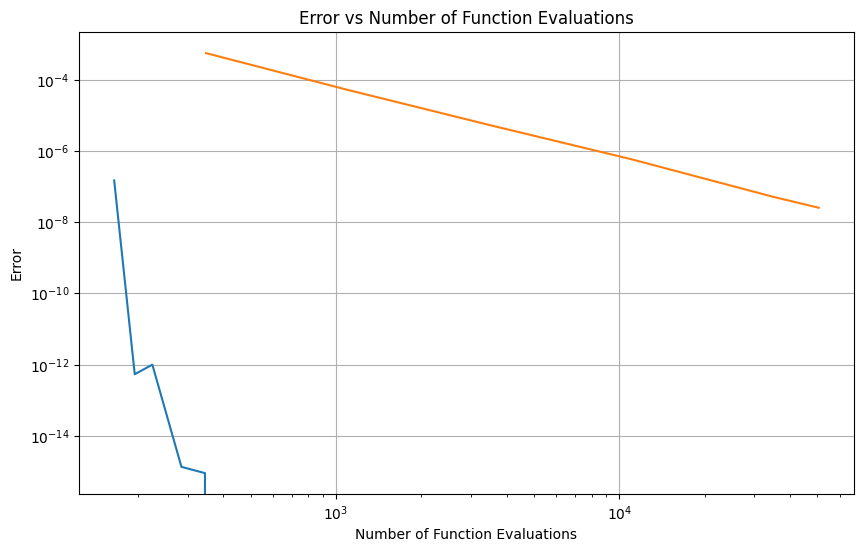

In [10]:
errors_gk2, evaluations_gk2,errors_trap2,evaluations_trap2 = integrator_f3(f3,6)
# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(evaluations_gk2, errors_gk2,label='Gauss-Kronrod')
plt.loglog(evaluations_trap2, errors_trap2,label='Trapezoidal')
plt.xlabel('Number of Function Evaluations')
plt.ylabel('Error')
plt.title('Error vs Number of Function Evaluations')
plt.grid(True)
plt.show()
